In [97]:
import numpy as np
import pandas as pd
import datetime as dt
from Functions import (  import_csv_BondList,
                        import_csv_BondTimeSeries)
import matplotlib.pyplot as plt

## Bond List

In [98]:
BondListC = import_csv_BondList('DataFrames/BondList.csv')
BondListC['First Issue Date'].head();
mask = (BondListC['First Issue Date'] > dt.datetime(1862,1,1)) & (BondListC['First Issue Date'] < dt.datetime(1872,1,1))

In [99]:
BondListC.loc[mask, :];

The 5-20s bonds were U.S. Treasury bonds that were issued to help finance the Union war effort, which includes supplies, equipment, and the salaries of soldiers, during the Civil War. The name “5-20s” came from the bond’s nature of maturity; that of a 20 year maturity period that could be redeemed after the span of 5 years. The 5-20s paid a 6 percent coupon, and was authorized for a total amount of 500 million dollars. Congress was able to come towards an agreement to pay coupons in specie, but left the conversation surrounding the redemption of the par value to be decided on a later date. However, it was advertised by Jay Cooke, who has exclusive access to brokering the bonds, to be redeemed with specie as opposed to lawful money (greenbacks) which traded substantially lower.


Unlike financing efforts of previous wars, the Civil War sold government debt to the public rather than conventional investors like banks or foreign nations. This was due two developments.

The federal government was virtually bankrupt even before the Civil War began. By December 1860, when Congress convened, the treasury was depleted, with no funds available to pay public creditors or even Congress members. Due to the actions of previous administrations that had undermined national credit, the government faced significant challenges in selling securities. When it did manage to issue bonds late in 1860, it had to offer a high interest rate of 12 percent to attract buyers. As a result, the 5-20s struggled to find a market among banks, given the scale of the debt and the comparatively high interest rates.

On the other hand, there was no foreign market for the 5-20s. Many British financiers and their clients had substantial investments in the South, particularly in slavery and cotton production. As a result, they were hesitant to invest heavily in American debt during the Civil War, leading to an underdeveloped market. France exhibited similar reluctance; Napoleon III prohibited the sale of U.S. bonds on the Paris Stock Exchange and hoped for a Confederate victory, which he believed might provide a strategic ally and a buffer against a divided United States. Without backing from the financial markets in London or Paris, the U.S. faced limited foreign investment opportunities.

Given these circumstances, the 5-20s were marketed towards the public, as opposed to just banks and foreign investors. For example, some advertising operations offered free coffee and donuts to those who were willing to listen to the benefits of investing in the bonds. These events specifically targeted those of the working classes who were either coming off or going on shift in the late night and early morning hours.

To make them more accessible, the 5-20s were offered in smaller denominations as well as larger denominations of $50, $100, $500, $1,000, $5,000, $10,000, catering to banks, foreign investors, and the general public.

## Bond Quantity

In [100]:
BondQuantC = import_csv_BondTimeSeries('DataFrames/BondQuant.csv')
BondQuantC.head();

In [101]:
five_twenties = (20101, 'Total Outstanding')
full_period = (BondQuantC.index>dt.datetime(1862,12,1)) & (BondQuantC.index<dt.datetime(1878,12,1))
df_5_20_full = BondQuantC.loc[full_period, five_twenties].ffill() / 1e6

In [102]:
df_5_20_full.head();

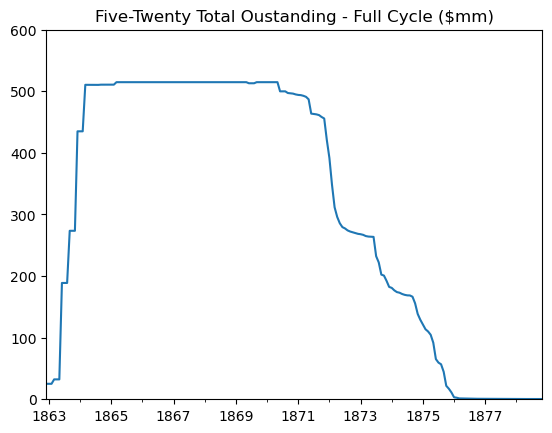

In [103]:
df_5_20_full.plot(title = 'Five-Twenty Total Oustanding - Full Cycle ($mm)', ylim=[0, 600]);

Initial sales were slow but picked up pace when Jay Cooke acted as a broker and advertiser, selling the bonds to the public. Starting in 1869, the government retired most of the 5-20s bonds, refinancing them with 4.5 percent, 30-year bonds and 4 percent, 15-year bonds. By 1877, all the 5-20s bonds had been redeemed.

In [104]:
issue_period = (BondQuantC.index>dt.datetime(1862,12,1)) & (BondQuantC.index<dt.datetime(1865,12,1))
df_5_20_issue = BondQuantC.loc[issue_period, five_twenties] / 1e6

In [105]:
issues = df_5_20_issue.dropna()
big = issues.diff()>10
big[dt.date(1862, 12, 31)] = True
big_issues = issues[big]

In [106]:
big = issues.diff()>10

In [110]:
ann = {
    dt.datetime(1862, 11, 30): 25,
    dt.datetime(1863, 3, 31): 32,
    dt.datetime(1863, 6, 30): 188,
    dt.datetime(1863, 9, 30): 273,    
    dt.datetime(1863, 12, 31): 434,    
}

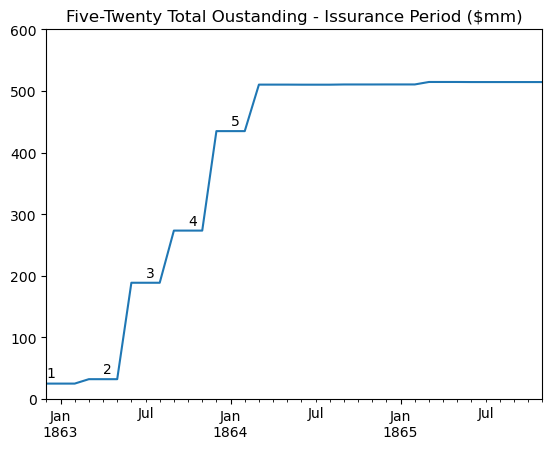

In [111]:
ax = df_5_20_issue.ffill().plot(title = 'Five-Twenty Total Oustanding - Issurance Period ($mm)', ylim=[0, 600]);
for i, k in enumerate(ann):
    ax.annotate(i+1, (k+dt.timedelta(days=30), ann[k]+10))

February 25th - May 1st
i. The 5-20s bonds were authorized for an amount of $500 million in February 1862, but by late September only $2.5 million worth were sold. When the 5-20s bonds were first issued, they were brokered by the government and “auctioned” to bankers. The 5-20s initially struggled to sell due to the size of the debt and the banks' demand for higher interest rates than what the government was willing to offer. The data starts from 1863 and is a continuation of the slow trend of bond sales that began when the bonds were first issued.

May 1st - July 30th
i. The Cooke brothers, through extensive lobbying, passed The National Banking Act of 1863, which required National Banks to issue notes backed by federal rather than state bonds. This created enormous demand for the 5-20s bonds in the subsequent months.
ii. Jay Cooke was given exclusive access to broker the bonds, and through his 2,500 salesmen and his brother’s media connections, he marketed the debt to the public using patriotic appeals.
iii. In March of 1863, public confidence was at an all-time low, and gold was increasing rapidly in price, while 5-20s were trading at 94 ½ of their par value. In response, Jay Cooke bought every bond selling below par value to boost the government’s credit. As a result, bond sales increased dramatically to a million a day. This increase in demand was so tremendous that “the great difficulty was to obtain enough bonds from the Treasury Department, which in turn was unable to get deliveries from the printers and engravers.”

July 30th - September 1st
i. The Battle of Gettysburg was a turning point in the war in favor of a Union victory. Investors likely saw the 5-20s as a safer investment.
ii. On July 1st, 1863, legal tender notes could no longer be converted into 5-20s. During that same time period, newspapers around the country, but predominantly those owned and influenced by the Cooke brothers, began to frame buying the 5-20s as the “last chance” to cash in on such a deal.

September 1st - April 1st
i. There was a succession of Union victories from September 1863 until the year's end.

## some important notes to consider

1. Pulling the strings behind the issuance and brokerage of the 5-20s bonds was Jay Cooke. The success of the 5-20s in raising war-time money is often credited to Salmon P. Chase, however it was Cooke who through intensive lobbying, put Chase in office, and later on Senator Sherman, both who were instrumental in not only creating the 5-20s bonds, but also in passing key bills that facilitated the sale of the bond.Cooke was the mastermind who put political figures into office so that he could profit off the commission of sales (Abernathy).
2. In a letter to a prospective investor, Jay writes "Congress has provided that the Bonds shall be PAID in Gold when due". The 5-20s were advertised to be redeemed for its par value in gold.

In [112]:
active_mask = BondQuantC.columns.get_level_values('Series') == "Active Outstanding"

In [113]:
outstanding = BondQuantC.loc[:, active_mask]

In [114]:
agg = outstanding.sum(axis=1)

## Bond Price

In [115]:
BondPriceC = import_csv_BondTimeSeries('DataFrames/BondPrice.csv')

In [116]:
five_twenties_price = BondPriceC.loc[(BondPriceC.index>dt.datetime(1862,12,1)) & (BondPriceC.index<dt.datetime(1878,12,1)), (20101, 'Average')]

In [126]:
prices = BondPriceC.mean(axis=1)

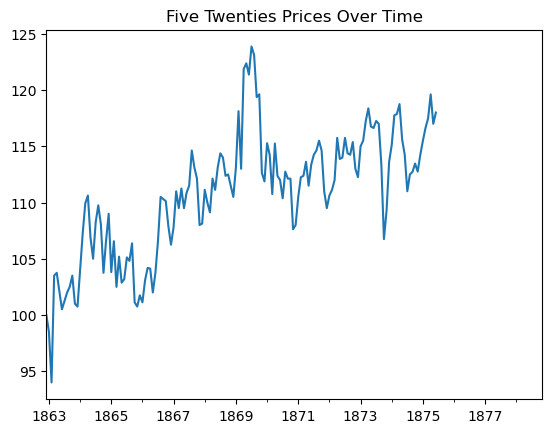

In [127]:
five_twenties_price.plot(title='Five Twenties Prices Over Time');

In the first few years upon issuance, the climb in prices was because the 5-20s were seen as a method of currency exchange (it could be purchased in Greenbacks but was advertised to be redeemable in gold). Thus as the value of greenbacks relative to gold depreciated, the prices of 5-20s rose. In later years, starting from the 1870s, interest rates fell, which made the 5-20s a more attractive investment. 

In 1869, the Public Credit Act was passed, clarifying the uncertainty over whether the 5-20 bonds would be redeemed in gold or greenbacks.
Because gold was considered more valuable compared to greenbacks the bonds became even more desirable, driving up their prices. 

The Panic of 1873 led to widespread bank failures. As banks collapsed, the financial system became unstable, leading to a lack of confidence in various financial instruments, including government bonds. The panic also triggered a stock market crash, which caused investors to liquidate assets rapidly, including "five-twenties" bonds, to cover losses and maintain liquidity.

In [119]:
five_twenties_price2 = BondPriceC.loc[issue_period, (20101, 'Average')]

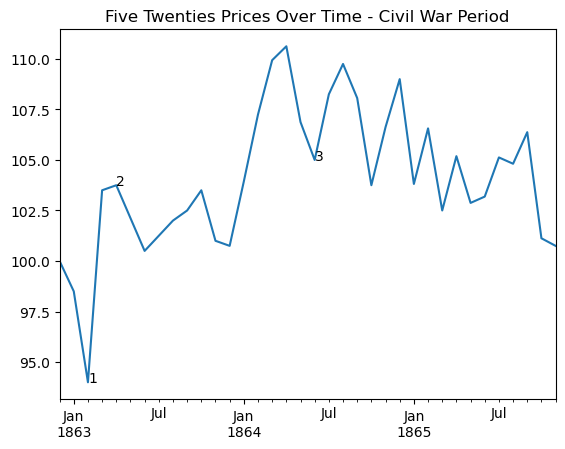

In [124]:
ax2 = five_twenties_price2.plot(title='Five Twenties Prices Over Time - Civil War Period');
x = [
    dt.datetime(1863, 2, 28), 
    dt.datetime(1863, 4, 30),
    dt.datetime(1864, 6, 30),
] 
for i, d in enumerate(x):
    ax2.annotate(i+1, (d, five_twenties_price2[d]))

1. On January 8 1863 it was made public that Congress had increased the supply of Greenbacks by $300 million. This increase in greenback supply would likely lead to inflation, reducing the value of greenbacks relative to specie. Since 5-20 bonds could be bought in greenbacks, and was advertised to be redeemable in specie, their relative value would increase as the value of greenbacks decreased. 
2. On April 27, 1863, the Confederate Treasury Note Act was passed, which authorized the issuance of interest-bearing Treasury notes, known as "Six Per Cent Non-Taxable Bonds." This, coupled with a series of Union defeats in April such as the Battle of Plymouth, as well as tumultuous political developments in the Union like the Proclamation of Amnesty and Reconstruction that caused unrest, could have resulted in investors preferring Southern bonds and thus crowding out investment for the 5-20s in foreign markets.
3. On June 3, 1864, the National Banking Act was signed with revisions from the earlier Act of 1863. The difference was a result of a combination of pressure from elite banker Jay Cooke and revisions in the 1863 Act, which forced New York City banks—holding a lion's share of the country's capital—to comply with the Act, increasing demand for the 5-20s substantially.

## Some observations

Interestingly, bond prices seem to be more sensitive towards developments in government actions or in the finance industry as opposed to developments in the war, with the exception of the Battle of Gettysburg. That is because regardless of the outcome of the war, the Union was going to persist, with or without the Confederate States. But the Battle of Gettysburg was the first well publicized turning point in a war that was previously in a stalemate. This victory signaled to investors that the war was progressing faster which meant the government could sooner stop borrowing and start paying back investors.

One of the biggest incongruencies on the graph that we are still investigating, is Early’s failed raid on the White house. Jubal Early’s army reached within five miles of the White House by July 11th. This created an uproar among Union states, the Washington Evening Star on July 10th wrote “The excitement in this city is intense and on the increase. Crowds are thronging the bulletin boards, and a thousand wild and improbable rumors are in circulation”. We know that this news struck deep within the financial community, because this resulted in the largest shift of the entire war for Greenbacks, a change of 4.8 percent which dwarfed the next largest 2.6 percent. 

## Who wanted the 5-20s to be redeemed in gold? 

Apart from those who held the 5-20s bonds, prominent banker Jay Cooke also wanted the 5-20s to be redeemed in gold. While acting as a salesman, Jay Cooke advertised that "Congress has provided that the Bonds shall be PAID in Gold when due". With his reputation on the line, it is most likely that Mr Cooke used his numerous political and media connections to force legislation that mandated government bonds to be paid back in gold. Because Jay Cooke advertised the 5-20s mainly to the working class (in his public statement on the payment in gold of the 5-20 bonds, it was stated that 9/10 subscribers were "the people") there was also widespread popular support for the 5-20s to be redeemed in gold. 

## Who wanted 5-20s to be redeemed in Greenbacks?

The push to redeem the 5-20s in greenbacks rather than gold came primarily from the Western states. The Western economy, heavily dependent on agriculture, faced a chronic scarcity of gold and specie, worsened by the war, as much of the hard currency had been drained to the East or out of circulation, creating a credit crunch. The economic struggles were made worse by crop failures, competition with older agricultural regions, and manipulative railroad rates controlled by Eastern interests. 

In this context, Western farmers and debtors, alongside populist and radical factions within the Democratic Party, saw the redemption of bonds in greenbacks as a practical solution to their financial troubles. By redeeming bonds with greenbacks, the government would inject additional money into the economy. Because greenbacks were not supported by gold, printing more of them would lead to a rise in the total money supply. This increase in money flow would supply essential liquidity to an economy lacking in hard currency.

Moreover, many Westerners, particularly farmers, were deeply in debt. They owed money in the form of mortgages and loans that had to be repaid in hard currency. If the government redeemed the bonds in gold, it would drive up the value of gold relative to greenbacks, further increasing the debt burden. By redeeming the bonds in greenbacks, which were less valuable than gold, the debtors would effectively reduce the amount they owed in real terms, easing their financial pressures.

Politically, these interests were represented by figures like Washington McLean, the boss of Hamilton County, who controlled the influential Cincinnati Daily Enquirer. McLean and his allies sought to capitalize on Western discontent with the Northeastern-dominated financial system. By advocating for greenback redemption, they hoped to gain political support from the Western states, realign the Democratic Party's priorities, and increase their influence within the party. 

## What did the debate look like in Congress?

In congressional debates, Republicans supported redemption in specie, arguing its benefits for bolstering government credit which made debt refinancing more affordable amidst lower interest rates. Conversely, Democrats advocated for redemption in greenbacks, emphasizing immediate savings on government expenditures.


## What were the impacts of debates about the redemption of 5-20s on the economy?

Dispute over how to redeem the 5-20s made the economy unstable, for it gave holders of these greenbacks a probability that their value investors would be devalued. As a result, consumer confidence and spending were reduced. The vaguely defined character of the bond redemption terms increased the effective sovereign risk and further depressed overall market confidence in US government debt and generated skepticism about future economic policies.

## How Did the 5-20 Bonds Influence Post-War Reconstruction and Economic Recovery?

A major share of the funds from the 5-20 bonds was instrumental in repairing the war-ravaged South. These were imperative in restoring facilities and getting economic activities going. The bonds made available the required capital for various strategically important infrastructure-based projects, thus giving impetus to economic growth and employment.


The huge issuance of 5-20 bonds added much to the national burden of debt. This attributed to the credit spread for US government bonds vis-à-vis other sovereign debts would have portrayed the perceived creditworthiness and risks associated with the US during reconstruction. 


Fortunately, the enactment of the 1869 Public Credit Act, which required government bonds to be redeemed in gold instead of Greenbacks, along with redemption efforts starting in 1867 using surplus revenues, restored confidence among both domestic and international investors. This reduction in the risk premium for U.S. government securities lowered interest rates, leading to the refinancing of remaining bonds by 1870 into 4.5 percent, 30-year bonds and 4 percent, 5-year bonds. By 1877, all 5-20 bonds had been completely redeemed.

## Citations

Adams, John. “International Bond Sales during the American Civil War.” The John Adams Institute, September 15, 2022. https://www.john-adams.nl/international-bond-sales-during-the-american-civil-war/. 

Adams, John. “The Most Democratic Bond Issue of the War.” The John Adams Institute, September 22, 2022. https://www.john-adams.nl/the-most-democratic-bond-issue-of-the-war/. 

Chester McA. Destler. “The Origin and Character of the Pendleton Plan.” The Mississippi Valley Historical Review 24, no. 2 (1937): 171–84. https://doi.org/10.2307/1892077.

Newman, Patrick. “The Origins of the National Banking System: The Chase—Cooke Connection and the New York City Banks.” The Independent Review 22, no. 3 (2018): 383–401. http://www.jstor.org/stable/26314773.

Cooke, Jay. Letter of Mr. Jay Cooke on the payment in gold of the U. S. five-twenty bonds. Dated. 1868. Pdf. https://www.loc.gov/item/96186382/.

Oberholtzer, Ellis Paxson. Jay Cooke, financier of the Civil War. vol. 1. New York: Kelley, 1968. 
Newman, P. (2018). "The Origins of the National Banking System: The Chase-Cooke Connection and the New York City Banks." The Independent Review, 22(3), 383-401. Published by Independent Institute. Retrieved from JSTOR.

Rothbard, M. N. (2002). History of Money and Banking in the United States: The Colonial Era to World War II. Ludwig von Mises Institute. Retrieved from Mises Institute.

Wikipedia contributors. "Economic history of the American Civil War." Wikipedia, The Free Encyclopedia, 2024. Available at Wikipedia.

Abernathy, C., et al. (2018). "Reconstruction." The American Yawp, Stanford University Press. Available at The American Yawp.

Abernathy, C., et al. (2018). "The Civil War." The American Yawp, Stanford University Press. Available at The American Yawp.

Bayley, R. (1869). "The National Debt of the United States." Economic Journal, 29(2), 220-240. Retrieved from your Dropbox.

Foner, E. 1988. Reconstruction: America's Unfinished Revolution, 1863–1877. New York: HarperCollins Publishers.

Blight, D. 2001. Race and Reunion: The Civil War in American Memory. Cambridge, MA: Harvard University Press.

Higgs, R. 1987. "Crisis and Leviathan: Critical Episodes in the Growth of American Government." New York: Oxford University Press.

McPherson, J. M. 1988. Battle Cry of Freedom: The Civil War Era. New York: Oxford University Press.

Ransom, R. L. (1989). Conflict and Compromise: The Political Economy of Slavery, Emancipation, and the American Civil War. Cambridge University Press.

Richardson, H. C. (2001). The Death of Reconstruction: Race, Labor, and Politics in the Post–Civil War North, 1865–1901. Harvard University Press.

Studenski, P., & Krooss, H. E. (1952). Financial History of the United States. McGraw-Hill Book Company, Inc.

Mitchell, B. R. (1962). Abstract of British Historical Statistics, Cambridge University Press. (For comparative analysis of post-war economies.)
